# Understanding Exploratory data analysis
## Important steps
### 1. Understanding the data
### 2. Clean the data
### 3. Analysis of relationship variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
datapoke=pd.read_csv("PokemonData.csv")

In [3]:
# understanding the data 
datapoke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
datapoke.tail() # tail end of the data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
datapoke.shape

(800, 13)

In [6]:
datapoke.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [7]:
#we can get how many unique value we have in this data set, even for categorical
datapoke.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [8]:
datapoke['Generation'].unique() 
#lets us understand that how many unique genrations are there

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
#removing the categorical objects
datapokenum= datapoke.select_dtypes(include= ['int64','float64','bool'])
datapokenum.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,318,45,49,49,65,65,45,1,False
1,2,405,60,62,63,80,80,60,1,False
2,3,525,80,82,83,100,100,80,1,False
3,3,625,80,100,123,122,120,80,1,False
4,4,309,39,52,43,60,50,65,1,False


In [10]:
# note that under describe we only have 9 columns as rest of them were non integer values 
datapokenum.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### cleaning of data

In [11]:
# rename the # as ID
datapokenum.rename(columns={'#':'ID'}, inplace=True)

# Convert all Variable Names to UPPERCASE
datapokenum.columns = datapokenum.columns.str.upper()

# Remove all spaces and dots from Variable Names
datapokenum.columns = datapokenum.columns.str.replace(".","", regex=True)
datapokenum.columns = datapokenum.columns.str.replace(" ","_", regex=True)

datapokenum.head()

C:\Users\smitha\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
0,1,318,45,49,49,65,65,45,1,False
1,2,405,60,62,63,80,80,60,1,False
2,3,525,80,82,83,100,100,80,1,False
3,3,625,80,100,123,122,120,80,1,False
4,4,309,39,52,43,60,50,65,1,False


In [12]:
#cleaning the data (check for null values)
datapokenum.isnull().sum()
#we need to check the null values and need to think should we drop it or replace it with some values.

ID            0
TOTAL         0
HP            0
ATTACK        0
DEFENSE       0
SP_ATK        0
SP_DEF        0
SPEED         0
GENERATION    0
LEGENDARY     0
dtype: int64

In [13]:
#removing redundant data, lets remove 'Total" as i think it is of no use (total is just the toal of everything)
datapokenum_9=datapokenum.drop('TOTAL', axis=1)
datapokenum_9.head()

,ID,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,3,80,100,123,122,120,80,1,False
4,4,39,52,43,60,50,65,1,False


## relationship analysis

In [15]:
datapokenum_9.corr()


,ID,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
ID,1.000000,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
HP,0.097614,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
ATTACK,0.102298,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
DEFENSE,0.094786,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
SP_ATK,0.088759,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
SP_DEF,0.085817,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
SPEED,0.010733,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
GENERATION,0.982516,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
LEGENDARY,0.153396,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<AxesSubplot:>

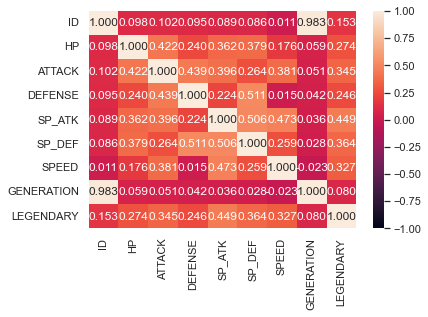

In [16]:
sb.heatmap(datapokenum_9.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f")

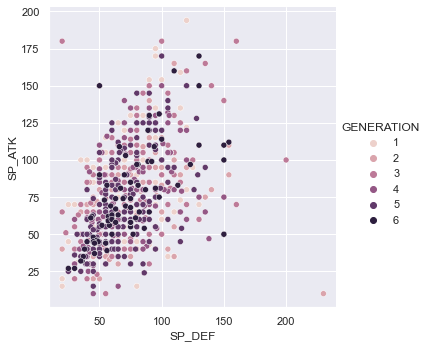

In [17]:
# relationship plot (three different values in the same plot)
#While the points are plotted in two dimensions, another dimension can be added to the plot by coloring 
#the points according to a third variable. 
#In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

sb.relplot(x='SP_DEF',y='SP_ATK', hue='GENERATION', data=datapokenum_9)

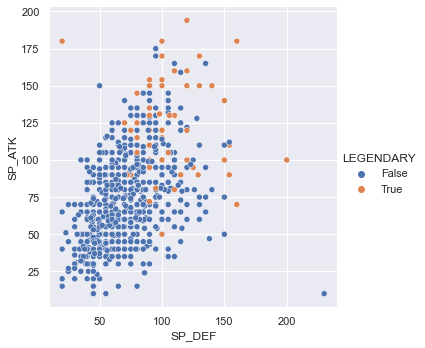

In [18]:
sb.relplot(x='SP_DEF',y='SP_ATK', hue='LEGENDARY', data=datapokenum_9)


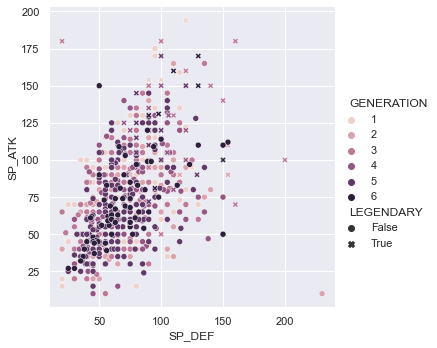

In [19]:
sb.relplot(x='SP_DEF',y='SP_ATK', hue='GENERATION',style='LEGENDARY', data=datapokenum_9)
#categorical plot

<AxesSubplot:xlabel='GENERATION', ylabel='ID'>

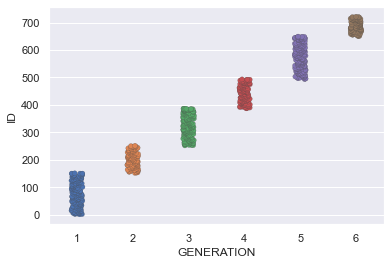

In [20]:
#another type of plot to explore
sb.stripplot(x="GENERATION", y="ID",linewidth=0.2, data=datapokenum_9)


C:\Users\smitha\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\smitha\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\smitha\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\smitha\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GENERATION', ylabel='SPEED'>

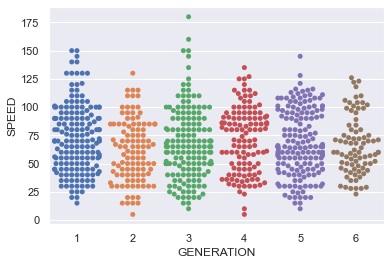

In [21]:
sb.swarmplot(x="GENERATION", y="SPEED",data=datapokenum_9)

In [ ]:
datapokenum_8=datapokenum.drop('LEGENDARY', axis=1)
sb.pairplot(datapokenum_8)

# HOUSE DATA

In [22]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Maximum Price, Seriously?!
#### Which of the houses sold for the maximum SalePrice? Why do you think that specific house commanded that price?

In [23]:
houseData.SalePrice.max()


755000

In [24]:
houseData.SalePrice.idxmax()

691

In [25]:
houseData.iloc[houseData.SalePrice.idxmax()]

Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object

In [26]:
maxpriceHouse=houseData.iloc[houseData.SalePrice.argmax()]
maxpriceHouse

Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object

In [27]:
for var in houseData:
    print(var, ":", maxpriceHouse[var])

Id : 692
MSSubClass : 60
MSZoning : RL
LotFrontage : 104.0
LotArea : 21535
Street : Pave
Alley : nan
LotShape : IR1
LandContour : Lvl
Utilities : AllPub
LotConfig : Corner
LandSlope : Gtl
Neighborhood : NoRidge
Condition1 : Norm
Condition2 : Norm
BldgType : 1Fam
HouseStyle : 2Story
OverallQual : 10
OverallCond : 6
YearBuilt : 1994
YearRemodAdd : 1995
RoofStyle : Gable
RoofMatl : WdShngl
Exterior1st : HdBoard
Exterior2nd : HdBoard
MasVnrType : BrkFace
MasVnrArea : 1170.0
ExterQual : Ex
ExterCond : TA
Foundation : PConc
BsmtQual : Ex
BsmtCond : TA
BsmtExposure : Gd
BsmtFinType1 : GLQ
BsmtFinSF1 : 1455
BsmtFinType2 : Unf
BsmtFinSF2 : 0
BsmtUnfSF : 989
TotalBsmtSF : 2444
Heating : GasA
HeatingQC : Ex
CentralAir : Y
Electrical : SBrkr
1stFlrSF : 2444
2ndFlrSF : 1872
LowQualFinSF : 0
GrLivArea : 4316
BsmtFullBath : 0
BsmtHalfBath : 1
FullBath : 3
HalfBath : 1
BedroomAbvGr : 4
KitchenAbvGr : 1
KitchenQual : Ex
TotRmsAbvGrd : 10
Functional : Typ
Fireplaces : 2
FireplaceQu : Ex
GarageType : Att

### is this price due to the locality of neighbourhood?

<AxesSubplot:xlabel='SalePrice'>

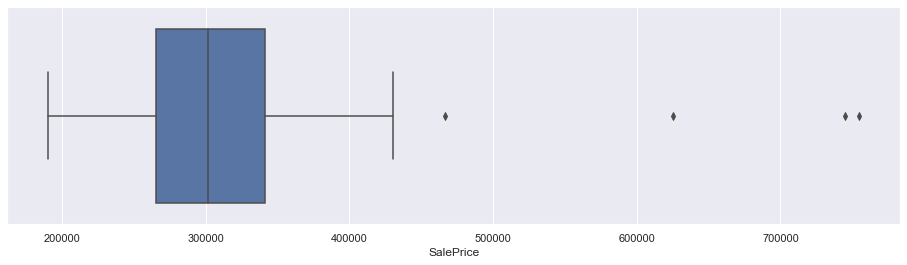

In [28]:
f=plt.figure(figsize=(16,4))
sb.boxplot(x="SalePrice", data=houseData[houseData.Neighborhood==maxpriceHouse.Neighborhood])

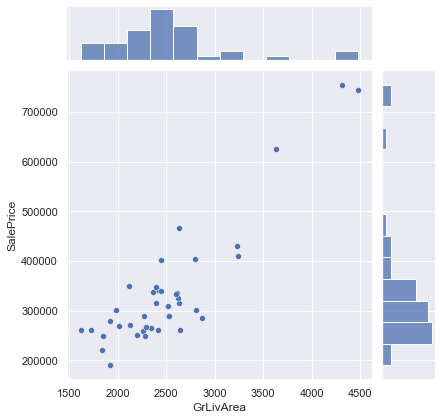

In [29]:
sb.jointplot(x="GrLivArea",y="SalePrice", data=houseData[houseData.Neighborhood==maxpriceHouse.Neighborhood])

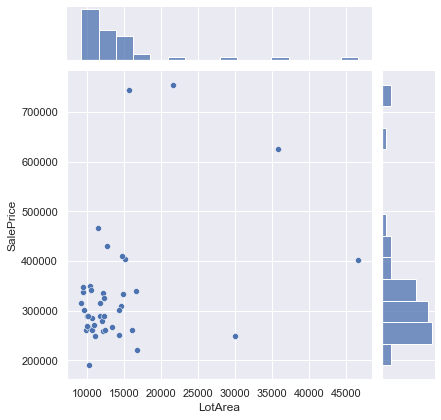

In [30]:
sb.jointplot(x="LotArea",y="SalePrice", data=houseData[houseData.Neighborhood==maxpriceHouse.Neighborhood])

In [ ]:
f=plt.figure(figsize=(16,4))
sb.boxplot(x="SalePrice", y="BldgType", data=houseData[houseData.Neighborhood==maxpriceHouse.Neighborhood])